In [43]:
import json
import os
import re

In [44]:
with open("./chatbot-arena-spoken-1turn-english-difference-voices.json") as f:
    raw_data = json.load(f)
gts = []
gt_mapping = {
    'model_a': 'A',
    'model_b': 'B',
    'tie': 'C',
    'tie (bothbad)': 'C'
}
for x in raw_data:
    gts.append(gt_mapping[x['winner']])
print("len:", len(gts))

len: 7824


In [45]:
def read_jsonl(file_path):
    data = []
    # Open and read the file line by line
    with open(file_path, 'r') as file:
        for line in file:
            # Parse each line as a JSON object
            json_obj = json.loads(line.strip())
            data.append(json_obj)
    print("len:", len(data))
    return data

In [46]:
def process_output(data):
    labels = []
    for x in data:
        response = x['response']
        # response = response[-20:]
        labels += [extract_abc(response)]
    calculate_percentage(labels)
    return labels

def calculate_correciness(labels, gts, reverse=False):
    # assert len(labels) == len(gts)
    labels = labels[:len(gts)]
    correct, incorrect = 0, 0
    for label, gt in zip(labels, gts):
        if reverse == True:
            if gt == 'A': 
                gt = 'B'
            elif gt == 'B': 
                gt = 'A'
        if label == gt:
            correct += 1
        else:
            incorrect += 1
    print("correct:   {:.2f}%".format(correct/(correct+incorrect)*100))
    print("incorrect: {:.2f}%".format(incorrect/(correct+incorrect)*100))

In [47]:
def extract_abc(text):
    pattern = r'\[\[(A|B|C)\]\]'
    # Find all matches
    matches = re.findall(pattern, text)
    # try:
    #     assert len(matches) <= 1
    # except:
    #     print(text[:50])
    if len(matches) == 1:
        result = matches[0]  # Extract the single match
    else:
        result = "D"  # Either no match or more than one match
    return result

In [48]:
def calculate_percentage(arr):
    # Get the total number of items
    total_count = len(arr)
    
    # Create a dictionary to store counts of each unique item
    item_counts = {'A': 0, 'B': 0, 'C': 0, 'D': 0}
    
    for item in arr:
        item_counts[item] = item_counts.get(item, 0) + 1
    
    # Calculate percentages and store them in a dictionary
    percentages = {item: (count / total_count) * 100 for item, count in item_counts.items()}
    
    # Display the result
    print("---------------")
    for item, percentage in percentages.items():
        print(f"{item}: {percentage:.2f}%")
    print("---------------")

In [49]:
def measure_bias(preds_ab, preds_ba):
    n = min(len(preds_ab), len(preds_ba))
    preds_ab = preds_ab[:n]
    preds_ba = preds_ba[:n]
    biasA, biasB, consistentAB, consistentCC, other = 0, 0, 0, 0, 0
    for pred_ab, pred_ba in zip(preds_ab, preds_ba):
        if pred_ab == "A" and pred_ba == "A":
            biasA += 1
        elif pred_ab == "B" and pred_ba == "B":
            biasB += 1
        elif pred_ab == "A" and pred_ba == "B":
            consistentAB += 1  
        elif pred_ab == "B" and pred_ba == "A":
            consistentAB += 1
        elif pred_ab == "C" and pred_ba == "C":
            consistentCC += 1
        else:
            other += 1
    total = biasA + biasB + consistentAB + consistentCC + other
    print("consistentAB: {:.2f}".format(consistentAB/total*100)) 
    print("consistentCC: {:.2f}".format(consistentCC/total*100)) 
    print("biasA:      {:.2f}".format(biasA/total*100)) 
    print("biasB:      {:.2f}".format(biasB/total*100)) 
    print("other:      {:.2f}".format(other/total*100)) 

In [54]:
text_text = process_output(read_jsonl("./experiments/chatbot-arena-7824/text-text-qwen2.jsonl"))
calculate_correciness(text_text, gts)
print("############################")
text_text_BA = process_output(read_jsonl("./experiments/chatbot-arena-7824/text-text-qwen2_BA.jsonl"))
calculate_correciness(text_text_BA, gts, reverse=True)
print("############################")
measure_bias(text_text, text_text_BA)

len: 7824
---------------
A: 60.33%
B: 23.63%
C: 1.41%
D: 14.63%
---------------
correct:   35.35%
incorrect: 64.65%
############################
len: 7824
---------------
A: 61.00%
B: 23.56%
C: 1.18%
D: 14.26%
---------------
correct:   34.38%
incorrect: 65.62%
############################
consistentAB: 33.21
consistentCC: 0.37
biasA:      36.41
biasB:      4.27
other:      25.74


In [55]:
0.5*(35.35+34.38)

34.865

In [56]:
audio_text = process_output(read_jsonl("./experiments/chatbot-arena-7824/audio-text-qwen2.jsonl"))
calculate_correciness(audio_text, gts)
print("############################")
audio_text_BA = process_output(read_jsonl("./experiments/chatbot-arena-7824/audio-text-qwen2_BA.jsonl"))
calculate_correciness(audio_text_BA, gts, reverse=True)
print("############################")
measure_bias(audio_text, audio_text_BA)

len: 7824
---------------
A: 51.96%
B: 25.40%
C: 0.95%
D: 21.70%
---------------
correct:   33.19%
incorrect: 66.81%
############################
len: 7824
---------------
A: 52.44%
B: 25.10%
C: 0.97%
D: 21.49%
---------------
correct:   32.67%
incorrect: 67.33%
############################
consistentAB: 35.44
consistentCC: 0.18
biasA:      25.24
biasB:      3.80
other:      35.34


In [53]:
0.5*(33.19+ 32.67)

32.93

In [57]:
audio_audio = process_output(read_jsonl("./experiments/chatbot-arena-7824/audio-audio-qwen2.jsonl"))
calculate_correciness(audio_audio, gts)
print("############################")
audio_audio_BA = process_output(read_jsonl("./experiments/chatbot-arena-7824/audio-audio-qwen2_BA.jsonl"))
calculate_correciness(audio_audio_BA, gts, reverse=True)
print("############################")
measure_bias(audio_audio, audio_audio_BA)

len: 7824
---------------
A: 11.29%
B: 5.32%
C: 0.97%
D: 82.43%
---------------
correct:   5.93%
incorrect: 94.07%
############################
len: 7824
---------------
A: 10.67%
B: 5.80%
C: 1.43%
D: 82.09%
---------------
correct:   5.97%
incorrect: 94.03%
############################
consistentAB: 2.70
consistentCC: 0.05
biasA:      3.26
biasB:      0.74
other:      93.25


In [58]:
0.5*(5.93+5.97)

5.949999999999999

In [59]:
calculate_correciness(text_text, audio_text)

correct:   58.40%
incorrect: 41.60%


In [60]:
calculate_correciness(text_text, audio_audio)

correct:   22.49%
incorrect: 77.51%


In [61]:
calculate_correciness(audio_text, audio_audio)

correct:   27.03%
incorrect: 72.97%


# System level analysis

In [62]:
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [72]:
def analyze_correlation_and_plot(list_a, list_b):
    # 1. Compute Pearson correlation
    pearson_corr, _ = stats.pearsonr(list_a, list_b)

    # 2. Compute Spearman correlation
    spearman_corr, pvalue = stats.spearmanr(list_a, list_b)

    # Print results
    print(f"Pearson Correlation: {pearson_corr:.3f}")
    print(f"Spearman Correlation: {spearman_corr:.3f}")
    print("pvalue Spearman: {:.2e}".format(pvalue))
    
    # 4. Scatter plot with best-fit line
    plt.figure(figsize=(5, 4))
    plt.scatter(list_a, list_b, color='blue', label='Data points')

    # Best fit line
    coefficients = np.polyfit(list_a, list_b, 1)  # Linear fit (degree=1)
    poly = np.poly1d(coefficients)
    best_fit_line = poly(list_a)

    plt.plot(list_a, best_fit_line, color='red', label='Best Fit Line')
    plt.xlabel('Human Judge (Win Rate)')
    plt.ylabel('LLM Judge (Win Rate)')
    plt.title('Scatter Plot with Best Fit Line')
    plt.legend()
    plt.grid()
    plt.show()

In [73]:
with open("./chatbot-arena-spoken-1turn-english-difference-voices.json") as f:
    raw_data = json.load(f)

In [74]:
uniq_systems = set([x['model_a'] for x in raw_data] + [x['model_b'] for x in raw_data])
uniq_systems = list(uniq_systems)
len(uniq_systems)

20

In [75]:
def system_level_analysis(path_ab, path_ba):
    data_ab = read_jsonl(path_ab)
    data_ba = read_jsonl(path_ba)
    n = min([len(data_ab), len(data_ba), len(raw_data)])
    print("n:", n)
    
    system_preds = {k: [] for k in uniq_systems}
    system_gts = {k: [] for k in uniq_systems}
    
    for i in range(n):
        x = raw_data[i]
        ab = data_ab[i]
        ba = data_ba[i]
        modelA, modelB = x['model_a'], x['model_b']
        
        label_ab = extract_abc(ab['response'][-20:])
        if label_ab == 'A':
            system_preds[modelA].append(1.0)
            system_preds[modelB].append(0.0)
        elif label_ab == 'B':
            system_preds[modelB].append(1.0)
            system_preds[modelA].append(0.0)
        else:
            system_preds[modelB].append(0.5)
            system_preds[modelA].append(0.5)
            
        label_ba = extract_abc(ba['response'][-20:])
        if label_ba == 'A':
            system_preds[modelB].append(1.0)
            system_preds[modelA].append(0.0)
        elif label_ba == 'B':
            system_preds[modelA].append(1.0)
            system_preds[modelB].append(0.0)
        else:
            system_preds[modelB].append(0.5)
            system_preds[modelA].append(0.5)
    
        if x['winner'] == 'model_a':
            system_gts[modelA].append(1.0)
            system_gts[modelB].append(0.0)
        elif x['winner'] == 'model_b':
            system_gts[modelB].append(1.0)
            system_gts[modelA].append(0.0)
        else:
            system_gts[modelA].append(0.5)
            system_gts[modelB].append(0.5)
            
    system_level_pred, system_level_gts = [], []
    for system, pred in system_preds.items():
        if len(pred) == 0:
            continue
        gts = system_gts[system]
        assert len(pred) == 2*len(gts)
        assert math.isnan(np.mean(pred)) is False
        system_level_pred.append(np.mean(pred))
        system_level_gts.append(np.mean(gts))
    analyze_correlation_and_plot(system_level_gts, system_level_pred)

len: 7824
len: 7824
n: 7824
Pearson Correlation: 0.645
Spearman Correlation: 0.648
pvalue Spearman: 2.00e-03


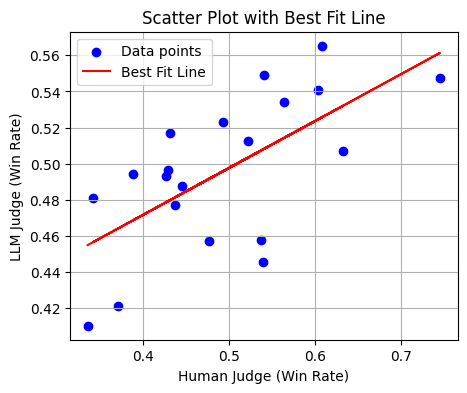

In [76]:
system_level_analysis("./experiments/chatbot-arena-7824/text-text-qwen2.jsonl", "./experiments/chatbot-arena-7824/text-text-qwen2_BA.jsonl")

len: 7824
len: 7824
n: 7824
Pearson Correlation: 0.585
Spearman Correlation: 0.615
pvalue Spearman: 3.90e-03


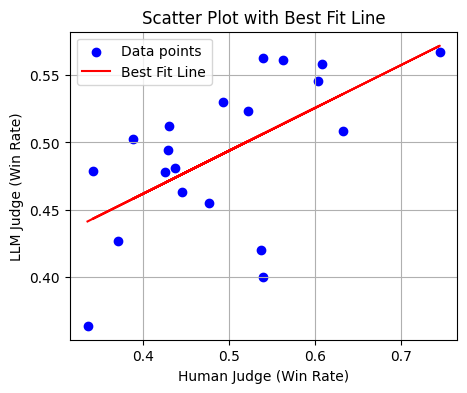

In [77]:
system_level_analysis("./experiments/chatbot-arena-7824/audio-text-qwen2.jsonl", "./experiments/chatbot-arena-7824/audio-text-qwen2_BA.jsonl")

len: 7824
len: 7824
n: 7824
Pearson Correlation: 0.022
Spearman Correlation: 0.095
pvalue Spearman: 6.91e-01


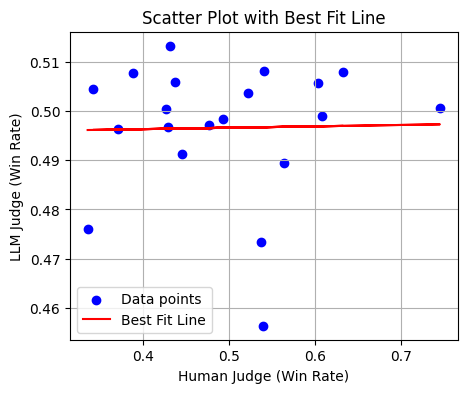

In [78]:
system_level_analysis("./experiments/chatbot-arena-7824/audio-audio-qwen2.jsonl", "./experiments/chatbot-arena-7824/audio-audio-qwen2_BA.jsonl")